# Medical Insurance Cost Data
> Source: __[Insurance Data](https://www.kaggle.com/mirichoi0218/insurance)__
> , Analysis by: __Rupinder Kaur__

**Objective:** To predict the charges of medical insurance using independent variables such as age, sex, smoker, bmi, children and region.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
## Reading the dataset
insurance_data = pd.read_csv("insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

In [3]:
## Checking for missing values
insurance_data.isna().sum() ## there is no value missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
## summary statistics 
insurance_data.describe()
# From below, the minimum someone is paying for medical insurance is $1121.87 and the maximum is $63770.43.
#  The mean for insurance charges is $13270-> since the data has extreme values and from the cell below, the
#   distribution of charges is skewed to the right, therefore mean is not a good measure of central tendency for charges

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


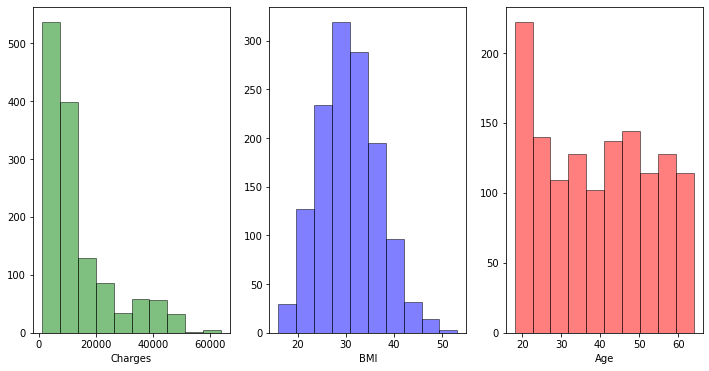

In [5]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.hist(insurance_data["charges"], alpha = 0.5, edgecolor = 'black', color = 'g')
# From the histogram below, the distribution for charges is right skewed -> it contains some extreme values
plt.xlabel("Charges")

plt.subplot(1,3,2)
plt.hist(insurance_data["bmi"], alpha = 0.5, edgecolor = 'black', color = 'b')
# the distribution of bmi is approximately normal
plt.xlabel("BMI")

plt.subplot(1,3,3)
plt.hist(insurance_data["age"], alpha = 0.5, edgecolor = 'black', color = 'r')
# age is distributed pretty evenly for the most part
plt.xlabel("Age")

plt.show()


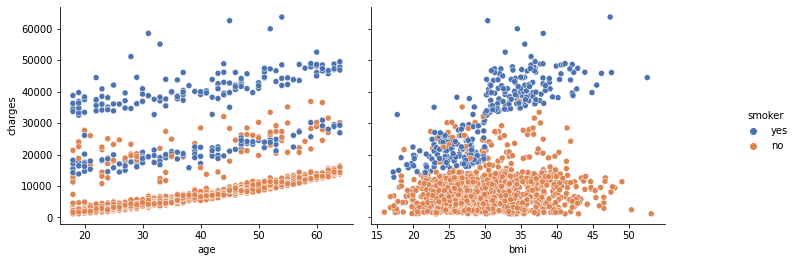

In [6]:
g = sns.pairplot(insurance_data, x_vars = ['age', 'bmi'],
             y_vars = ['charges'], hue="smoker", palette = "deep")
g.fig.set_size_inches(12,4)

From the pairplot above, it is evident that smokers are paying more compare to non-smokers for medical insurance regardless of their age, and bmi. For the charges vs. bmi scatterplot, the varaiance is __not equal__. Transforming the varaibles can help with heteroscedasticity for regression analysis. There are few outliers and from the pairplot above, they seem to be the people who are paying $50,000 and above. However, there might be more outliers than that. I will inspect them later.


In [7]:
## checking if there is any particular factor that leads people to pay above $ 50,000
insurance_data[insurance_data["charges"]>= 50000]
# we can see 1) all of them falls within in the obesity range(30 and above) for the bmi
#            2) all of them are smokers

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [8]:
## checking  if the people who pay less than $10000 in medical insurance cost are non-smokers
# filtering out the data for people who pay less than 10000 in insurance
less_10 = insurance_data[insurance_data["charges"] <= 10000]
less_10 # 712 people pay less than $10,000

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1326,42,female,32.87,0,no,northeast,7050.0213
1327,51,male,30.03,1,no,southeast,9377.9047
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [9]:
## how many people from the above query are smokers?
(less_10["smoker"] == "yes").sum() # so all the people who pay less than $10,000 for medical insurance are non smokers

0

In [10]:
## how many of them are in obesity range for bmi?
(less_10["bmi"]>=30).sum() # There are 354 out 712 who are obese and pay less than $10000 -> variable "smoker" might play a
# bigger role in determining the insurance charges

354

<AxesSubplot:xlabel='children', ylabel='charges'>

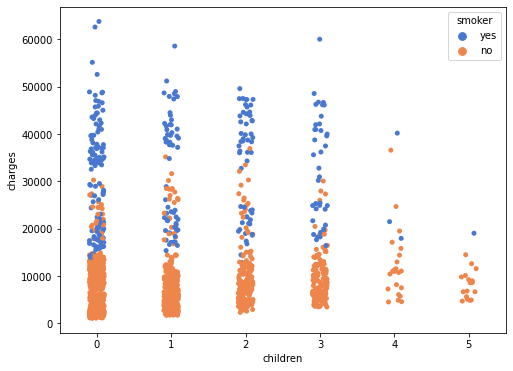

In [11]:
## Exploring the variable "children" and it's association with insurance charges
plt.figure(figsize=(8,6))
sns.stripplot(data = insurance_data, x = "children", y = "charges", hue = "smoker", palette = "muted")
# As it can be seen, charges depend  on whether the parents of these children are smokers or not, rather than the number 
  # of kids these people have

In [12]:
## Exploring if a person's sex plays any role in determining the insurance charges
female = (insurance_data["sex"] == "female").sum()
male = (insurance_data["sex"] == "male").sum()

print(f'The number of females in the insurance data are {female}, and males are {male}')

The number of females in the insurance data are 662, and males are 676


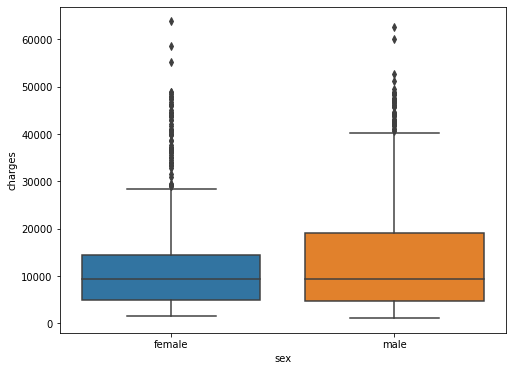

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x = "sex", y = "charges", data = insurance_data)
plt.show()
# from the plot below, for females, charges above $30000 are considered outliers, and for males, charges above $40,000 are
# considered outliers 
# And variability in insurance charges for males is higher compare to females

In [14]:
## How many females and male are smokers in the data?
f_smoker = ((insurance_data.sex == "female") & (insurance_data.smoker == "yes")).sum()
m_smoker = ((insurance_data.sex == "male") & (insurance_data.smoker == "yes")).sum()

print(f'Females who smoke: {f_smoker} \nMales who smoke: {m_smoker}')

Females who smoke: 115 
Males who smoke: 159


## Data Preprocessing

In [15]:
insurance = insurance_data.copy()

In [16]:
## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ["sex", "smoker"]:
    insurance[i] = le.fit_transform(insurance[i])


In [17]:
insurance.head()
# for the variable "sex"-> 0 is for female and 1 is for male
# for the variable "smoker"-> 1 is for smokers and 0 is for non-smokers

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [18]:
## One Hot Encoding to encode variable "region"
insurance = pd.get_dummies(insurance, columns = ['region'])
insurance.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [19]:
## renaming the columns
insurance = insurance.rename(columns = {"region_northeast": "northeast", "region_northwest": "northwest", 
                            "region_southeast": "southeast","region_southwest" : "southwest"})

In [20]:
## rearranging the columns
insurance = insurance[["age", "sex", "bmi", "children", "smoker", "northeast", "northwest", 
                                 "southeast", "southwest", "charges"]]
insurance

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0,10600.54830
1334,18,0,31.920,0,0,1,0,0,0,2205.98080
1335,18,0,36.850,0,0,0,0,1,0,1629.83350
1336,21,0,25.800,0,0,0,0,0,1,2007.94500


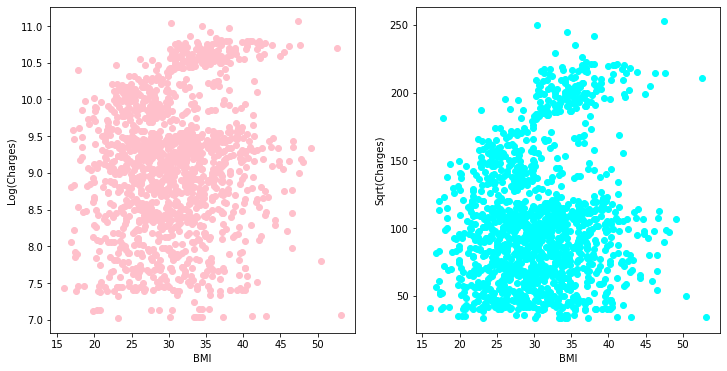

In [21]:
## transform "charges"
x = insurance["bmi"]
y = insurance["charges"].apply(np.log)
y1 = insurance["charges"].apply(np.sqrt)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(x,y, c = "pink")
plt.xlabel("BMI")
plt.ylabel("Log(Charges)")

plt.subplot(1,2,2)
plt.scatter(x,y1, c = "cyan")
plt.xlabel("BMI")
plt.ylabel("Sqrt(Charges)")

plt.show()

# Although both transformations help with heteroscedasticity, log transformation is slightly better.

In [22]:
## For regression analysis
insurance_tran = insurance.copy()

In [23]:
#adding the transformed variable 
insurance_tran = insurance_tran.assign(LogCharges = y)

In [24]:
## removing charges
insurance_tran = insurance_tran.drop(["charges"], axis = 1)
insurance_tran.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,LogCharges
0,19,0,27.900,0,1,0,0,0,1,9.734176
1,18,1,33.770,1,0,0,0,1,0,7.453302
2,28,1,33.000,3,0,0,0,1,0,8.400538
3,33,1,22.705,0,0,0,1,0,0,9.998092
4,32,1,28.880,0,0,0,1,0,0,8.260197


In [25]:
## correlation matrix
corr_matrix = insurance_tran.corr()

<AxesSubplot:>

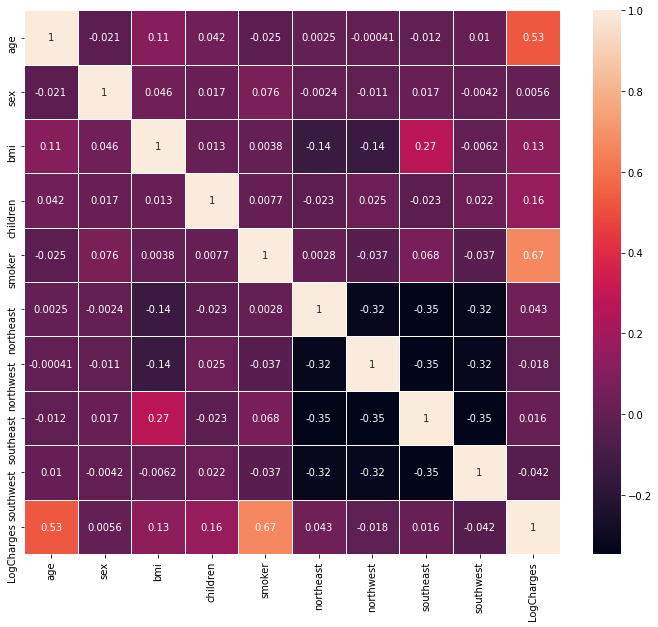

In [26]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, vmax = 1, annot=True, linewidths = 0.5)
# smoker and transformed charges have moderately strong correlation
# correlation between age and transfromed charges is moderate

## Model Fitting
###  Multiple Regression 

In [27]:
## x and transformed y variables
x1 = insurance_tran.drop(["LogCharges"], axis =1)
y1 = insurance_tran["LogCharges"]

In [28]:
## splitting the data into test and training sets
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [29]:
## fitting linear regression on the training data
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x1_train, y1_train)

LinearRegression()

In [30]:
## coefficient of determinant
reg.score(x1_test, y1_test) 
#80% of the variability in the data can be explained by this model

0.8047311493462987

In [31]:
## Adjusted R- Squared
1 - (1-reg.score(x1_test, y1_test))*(len( y1_test)-1)/(len( y1_test)-x1_test.shape[1]-1)
# similar to R-squared

0.7979194452537277

### Random Forest

In [32]:
## x and y variables
# using the data that is only dummy encoded but the response variable is not transformed
x2 = insurance.drop(["charges"], axis =1)
y2 = insurance["charges"]

In [33]:
## splitting the data into test and training sets
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [34]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
Rfr = RandomForestRegressor(n_estimators = 10, min_samples_split = 100 , random_state = 0)
Rfr.fit(x2_train, y2_train)

RandomForestRegressor(min_samples_split=100, n_estimators=10, random_state=0)

In [35]:
## computing R-square
Rfr.score(x2_test, y2_test)
# Accounts for 86% of the variability in the data

0.8600646611697708

In [36]:
fi = Rfr.feature_importances_

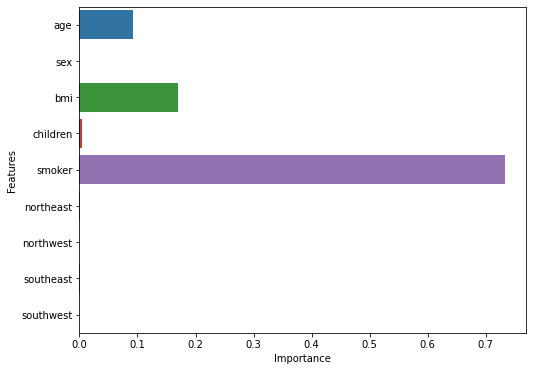

In [37]:
## Plotting feature importances
plt.figure(figsize = (8, 6))
fi_plot = sns.barplot(x = fi, y = insurance.columns.drop(["charges"]))
fi_plot.set_xlabel("Importance")
fi_plot.set_ylabel("Features")
plt.show()
# most important features are smoker, bmi, age 

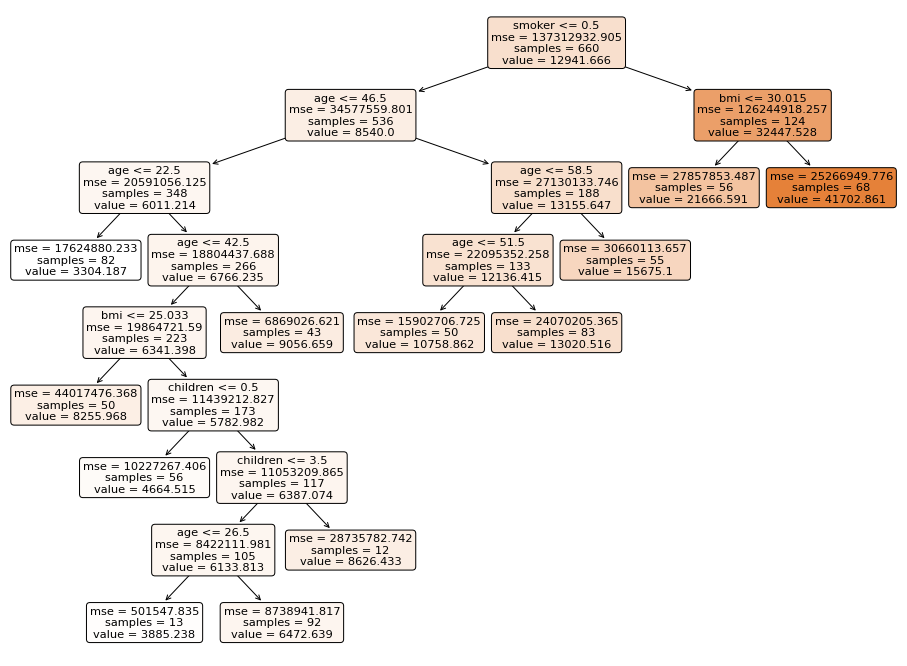

In [38]:
from sklearn import tree
plt.figure(figsize = (16,12))
# Plotting the first decision tree from the random forest 
tree.plot_tree(Rfr.estimators_[0], feature_names = x2.columns, filled = True, rounded = True)
plt.show()

## Conclusion

I analyzed the insurance data for this project. Insurance charges were predicted using two statistical learning tools: multiple regression and random forest. To perform the regression analysis, I transformed the depedent variable(charges) because when I plotted charges against bmi, the variance was not constant.The regression model accounts for 80% of the variation in the data. As for the random forest, I used the data where the dependent variable was not transformed. Random forest performed well as it can account for 86% of the variation in the data and it determined "smoker", "bmi" and "age" as the most important features.